<h3> Q8 Draw factor graph using networkx and run the sum product algorithm</h3>

In [74]:
import networkx as nx

In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import itertools as it

<b> Used classes to represent a Variable and a Factor as follows: </b>

In [75]:
class Variable:
    def __init__(self,name,support):
        self.name = name
        self.support = support



In [76]:
class Factor:
    def __init__(self,factname,variables):
        self.factname = factname
        self.variables=variables
    
    def calc_value(self,expr):
        
        var_support = [(x.name,x.support) for x in self.variables] ##### get name and support of each variable
        sets = list(it.product(*[t[1] for t in var_support])) ##### get all possible combinations of variable domains
        expr_eval = list(expr) ###### the expression to evaluate is string. Change it to a list
        dict_fact_values = {}  ###### dictionary for storing factor calc values
        expr_et = list(expr_eval) 
        for combo in sets:     #### For each combination of support variables, evaluate the expression
            j=0
            for i in range(0,len(expr_eval)):
                if expr_eval[i].isalpha():
                    expr_et[i] = expr_eval[i].replace(expr_eval[i],str(combo[j]))
                    j+=1
            dict_fact_values[combo]=eval(''.join(expr_et))
        
        return dict_fact_values
        

In [77]:
## Create variables ... objects of class Variable... provide support for vairables
A=Variable("a",[1,2])
B=Variable("b",[1,2])
C=Variable("c",[1,2])
D=Variable("d",[1,2])
E=Variable("e",[1,2])

In [78]:
#Create factors... objects of class Factor.. provide the variables which are required to calculate factors

F1=Factor("f1",[A,B])
F2=Factor("f2",[B,C,D])
F3=Factor("f3",[C])
F4=Factor("f4",[D,E])
F5=Factor("f5",[D])

In [110]:
#### Create a bipartite graph with variables and factors using networkx


factor_graph = nx.Graph()
factor_graph.add_nodes_from([F1,F2,F3,F4,F5], bipartite=0) # Add the node attribute "bipartite"
factor_graph.add_nodes_from([A,B,C,D,E], bipartite=1)
factor_graph.add_edges_from([(A,F1),(B,F1),(B,F2),(C,F2),(D,F2),(C,F3),(D,F5),(D,F4),(E,F4)])


In [123]:
labeldict={}
color_map = []
for n in factor_graph:
        if type(n) is Variable:
            labeldict[n]=n.name
            color_map.append('blue')
        else:
            labeldict[n]=n.factname
            color_map.append('green')

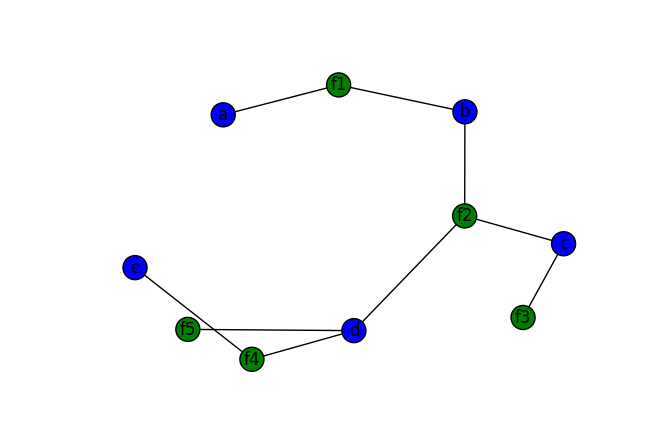

In [124]:
nx.draw(factor_graph, node_color=color_map, labels=labeldict, with_labels=True)
plt.show()

In [125]:
################ Calculate factor values for each factor.

f1_values = F1.calc_value("a*b")
f2_values = F2.calc_value("2*(5-b*c)-d+1")
f3_values = F3.calc_value("3-c")
f4_values = F4.calc_value("d*e")
f5_values = F5.calc_value("3-d")

Next steps:
---- Use Tree data structure. Designate node "B" as root of a tree
---- implement message passing from leaves to root and back
---- calculate marginal probablities.

<b> If sum product is repeated for every single node, the complexity of the algorithm becomes O(N^2)
If a tree data structure is used, the computation of messages will take O(N) running time complexity.
Also the calculation of marginals will require O(N). Thus total running time will be O(N)+O(N) = O(N)</b>